In [2]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw as pl

g++-12 -std=c++17 -Wall -O3 -o help Newtonian.cpp


In [ ]:
def plot_loglog(ax, tot_clust):
    x = np.linspace(1, len(tot_clust), (len(tot_clust)))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, tot_clust)
    ax.plot(x, tot_clust, '+')

def plot_samplex(ax, clusters):
    list = np.zeros(len(clusters))
    for i in range(len(clusters)):
        list[i] = np.sum(clusters[i:])/np.sum(clusters)
    ax.set_xscale('log')
    ax.set_yscale('log')
    x = np.linspace(1, len(list), len(list))
    ax.plot(x, list)
    return x, list

def plot_ccdf1(ax, tot_clust):
    N = len(tot_clust)
    x = np.sort(tot_clust) 
    y = np.arange(N) / float(N)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, 1-y)

def plot_ccdf2(ax, tot_clust, dens=False):
    count, bins_count = np.histogram(tot_clust, bins=np.logspace(0, np.log10(len(tot_clust)), 5000), density=dens)
    pdf = count / sum(count) 
    cdf = np.cumsum(pdf)
    ccdf = 1 - cdf
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(bins_count[1:], ccdf)
    return bins_count[1:], ccdf

def pl(x, a, b):
    return a * np.power(x, -b)

def fit_pl(x, y):
    return scipy.optimize.curve_fit(power_law, x, y)

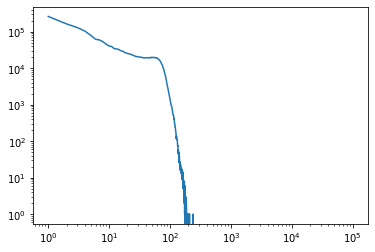

In [66]:
size, amount = np.loadtxt("3D_data.txt", skiprows=1, unpack=True)
plt.loglog(size[1:], amount[1:])

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/sennevw/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/home/sennevw/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /


1.2206050859519988
182.19527993253513 1.012398624111004e-29


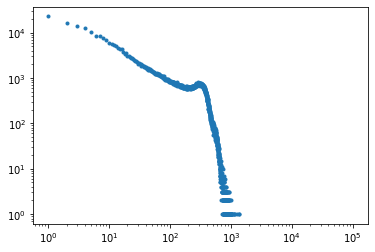

In [104]:
size, amount = np.loadtxt("r4.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, '.', )
size1 = []
size2 = []
amount1 = []
amount2 = []
for i, j in enumerate(size):
    if j < 130:
        size1.append(j)
        amount1.append(amount[i])
    else:
        size2.append(j)
        amount2.append(amount[i])

result1 = pl.Fit(amount2, discrete=True)
R, p = result1.distribution_compare('lognormal', 'power_law')
print(result1.alpha)
print(R, p)




In [ ]:
r=1 alpha 3.04 p=0.87
r=2 geeft alpha=2.52 wat goed kan zijn maar de p-waarde van power law behaviour is 0.99, de p waarde van lognormal staart is 0.11
r=3 alpha 2.33 p=0.805 staart p is 3.97*10^11
r=4 alpha 2.29 p=0.905, staart p=1*10^29
r=5 geeft alpha=2.29 p=0.63, de p waarde van lognormal staart is 0.004
